# Exploring some Embeddings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
import json

In [2]:
%run ./tools.ipynb

## Read the embeddings

We have some pre-generated embeddings stored in a file - we just read this in.

In [3]:
# Open the file
with open('embeddings.json', 'r') as file:
    content = file.read()

embeddings_json = json.loads(content)
df = pd.DataFrame(embeddings_json)

embeddings = np.array([e for e in df.embeddings])

## Display the resulting data frame with some of the embeddings.

In [4]:
df

,prompt,embeddings
0,What is the meaning of life?,"[0.006718567, 0.0092633655, 0.013849194, 0.000..."
1,What is the purpose of existance?,"[0.008168352, 0.0068519413, 0.008236974, 0.000..."
2,How to achieve enlightenment?,"[0.006591066, 0.0075591616, 0.0034808556, -0.0..."
3,What are the benefits of argyle socks?,"[0.0114647085, 0.020039184, 0.008325725, 0.006..."
4,Are argyle socks better?,"[0.01807708, 0.0047716643, 0.009986692, 0.0070..."


## Try a Scatter plot

Sometimes, just plotting data across the range index will give us some idea of how things are clustered.  
In this case, we end up with a mud; but it's always worth a first shot.

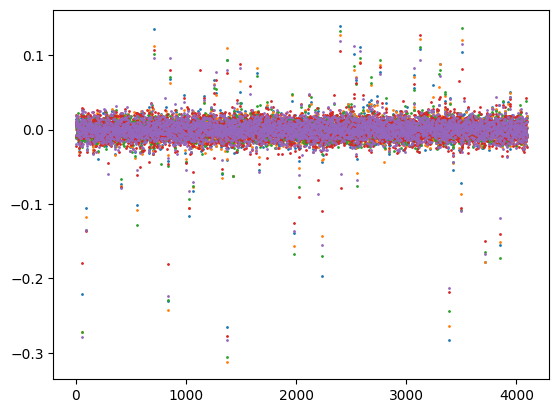

In [65]:
range = np.arange(0, 4096, 1)

p = plt.scatter(range, df.embeddings[0], 1)
p = plt.scatter(range, df.embeddings[1],1)
p = plt.scatter(range, df.embeddings[2],1)
p = plt.scatter(range, df.embeddings[3],1)
p = plt.scatter(range, df.embeddings[4],1)

## We have another trick for plotting these - PCA

Principal component analysis (PCA) attempts to rotate date in n-dimensional space so that the most important 
features appear early in the components.  In this case, we want a 2d graph, so we will just generate 2
components.

In [67]:
pca = PCA(n_components=2)
pca.fit(embeddings)
embeddings_pca = pca.transform(embeddings)

With just 2 principal components, we are capturing about 78% of the variance among the embeddings:

In [68]:
print(sum(pca.explained_variance_ratio_))

0.7780936275350574


We can now use plot these 2 components on a 2d chart - and it gives us a better picutre of how the embeddings relate.

0 What is the meaning of life?
1 What is the purpose of existance?
2 How to achieve enlightenment?
3 What are the benefits of argyle socks?
4 Are argyle socks better?


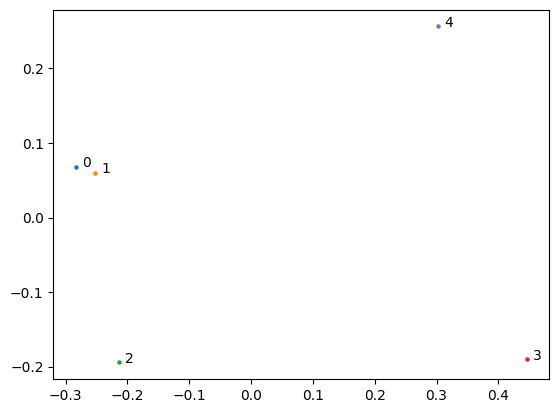

In [69]:
# plt.scatter(embeddings_pca[:,0], embeddings_pca[:,1], 2)
for idx, component in enumerate(embeddings_pca):
    print(f"{idx} {df.prompt[idx]}")
    plt.scatter(component[0], component[1], 5)
    plt.text(component[0] + .01, component[1], f"{idx}")

## Cross-tabulate the embeddings by cosine similarity

This generates a table comparing the cosine similarity between all of our embeddings. Numbers closer to 1 indicate
more similarity.

In [77]:
crosstab = [];
for ix, x in enumerate(embeddings):
    comparisons = {
        "prompt": df["prompt"][ix]
    }
    for iy, y in enumerate(embeddings):
        comparisons[df["prompt"][iy]] = cosine_similarity(x, y)
    crosstab.append(comparisons)

ct_df = pd.DataFrame(crosstab)
ct_df

,prompt,What is the meaning of life?,What is the purpose of existance?,How to achieve enlightenment?,What are the benefits of argyle socks?,Are argyle socks better?
0,What is the meaning of life?,1.000000,0.958874,0.872197,0.691914,0.754554
1,What is the purpose of existance?,0.958874,1.000000,0.893465,0.713168,0.783268
2,How to achieve enlightenment?,0.872197,0.893465,1.000000,0.706323,0.760044
3,What are the benefits of argyle socks?,0.691914,0.713168,0.706323,1.000000,0.847687
4,Are argyle socks better?,0.754554,0.783268,0.760044,0.847687,1.000000


## Cross-tabulate the embeddings by distance

This generates a table of distance - lower number means more closely related.

In [76]:
crosstab_dx = [];
for ix, x in enumerate(embeddings):
    comparisons = {
        "prompt": df["prompt"][ix]
    }
    for iy, y in enumerate(embeddings):
        comparisons[df["prompt"][iy]] = np.linalg.norm(x - y)
    crosstab_dx.append(comparisons)

dx_df = pd.DataFrame(crosstab_dx)
dx_df

,prompt,What is the meaning of life?,What is the purpose of existance?,How to achieve enlightenment?,What are the benefits of argyle socks?,Are argyle socks better?
0,What is the meaning of life?,0.000000,0.286797,0.505574,0.784966,0.700636
1,What is the purpose of existance?,0.286797,0.000000,0.461595,0.757405,0.658379
2,How to achieve enlightenment?,0.505574,0.461595,0.000000,0.766390,0.692757
3,What are the benefits of argyle socks?,0.784966,0.757405,0.766390,0.000000,0.551930
4,Are argyle socks better?,0.700636,0.658379,0.692757,0.551930,0.000000
